<ipython-input-23-c3b14acf3d43>:59: RuntimeWarning: invalid value encountered in sqrt
  mean - 2 * np.sqrt(var),
<ipython-input-23-c3b14acf3d43>:60: RuntimeWarning: invalid value encountered in sqrt
  mean + 2 * np.sqrt(var),


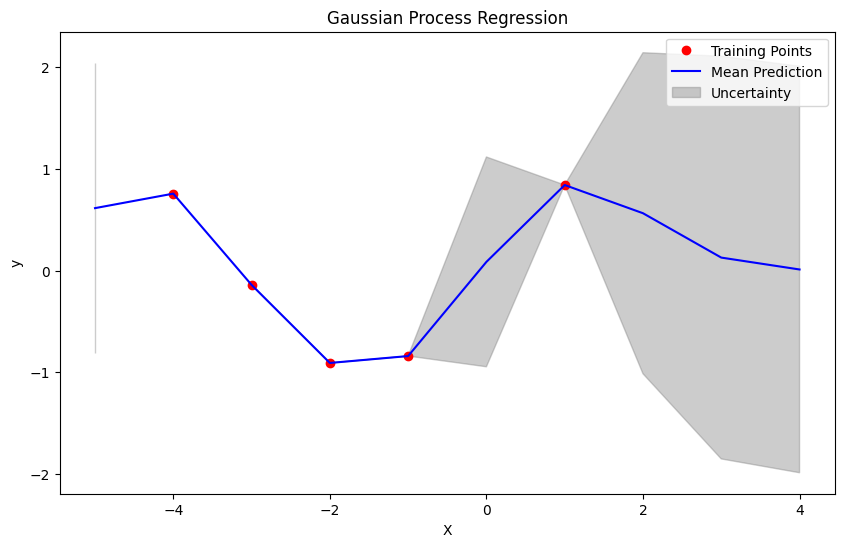

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Squared Exponential Kernel Used
#l:lengthscal parameter, sigma-f: variance parameter
def kernel(X1, X2, l=1.0, sigma_f=1.0):
    sq_dist = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 * sq_dist / l**2)#covariance matrix

def predict(X_train, y_train, X_test, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    K_train = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_test = kernel(X_train, X_test, l, sigma_f)
    K_test_train = kernel(X_test, X_train, l, sigma_f)
    K_inv = np.linalg.inv(K_train)

    mean = K_test_train.dot(K_inv).dot(y_train)
    cov = kernel(X_test, X_test, l, sigma_f) - K_test_train.dot(K_inv).dot(K_test)

    return mean.flatten(), np.diag(cov)

# Toy dataset
X_tr = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
y_tr = np.sin(X_tr)
X_te = np.arange(-5, 5).reshape(-1, 1)

# Predict
mean, var = predict(X_tr, y_tr, X_te)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(X_tr, y_tr, 'ro', label='Train Points')
plt.plot(X_te, mean, 'b-', label='Mean Prediction')
plt.fill_between(
    X_te.flatten(),
    mean - 2 * np.sqrt(var),
    mean + 2 * np.sqrt(var),
    color='gray',
    alpha=0.4,
    label='Uncertainty'
)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()
